In [30]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
path = "CSV statistics/QB_2020.csv"
qb2020 = pd.read_csv(path)
qb2020['YDS'] = qb2020['YDS'].str.replace(',', '').astype(float)
qb2020

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,143.0,Matt Schaub (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-4,0.0,0.0,1.0,-0.4,-0.4,0.0%
143,144.0,Nate Sudfeld (SF),5.0,12.0,41.7,32.0,2.7,0.0,1.0,2.0,2.0,12,0.0,1.0,1.0,-0.5,-0.5,0.0%
144,145.0,Tim Boyle (DET),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,-9,0.0,0.0,8.0,-0.9,-0.1,0.1%
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:

mask = qb2020.G >= 10 
qb2020 = qb2020[mask]
qb2020.reset_index(drop=True)

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1.0,Josh Allen (BUF),396.0,572.0,69.2,4544.0,7.9,37.0,10.0,26.0,102.0,421,8.0,6.0,16.0,405.7,25.4,99.8%
1,2.0,Kyler Murray (ARI),375.0,558.0,67.2,3971.0,7.1,26.0,12.0,27.0,133.0,819,11.0,4.0,16.0,390.7,24.4,99.6%
2,3.0,Aaron Rodgers (GB),372.0,526.0,70.7,4299.0,8.2,48.0,5.0,20.0,38.0,149,3.0,2.0,16.0,387.6,24.2,96.3%
3,4.0,Patrick Mahomes II (KC),390.0,588.0,66.3,4740.0,8.1,38.0,6.0,22.0,62.0,308,2.0,2.0,15.0,380.3,25.4,99.8%
4,5.0,Deshaun Watson (HOU),382.0,544.0,70.2,4823.0,8.9,33.0,7.0,49.0,90.0,444,3.0,3.0,16.0,376.4,23.5,47.7%
5,6.0,Russell Wilson (SEA),384.0,558.0,68.8,4212.0,7.5,40.0,13.0,47.0,83.0,513,2.0,4.0,16.0,372.6,23.3,96.2%
6,7.0,Ryan Tannehill (TEN),315.0,481.0,65.5,3819.0,7.9,33.0,7.0,24.0,43.0,266,7.0,1.0,16.0,350.8,21.9,87.8%
7,8.0,Tom Brady (TB),401.0,610.0,65.7,4633.0,7.6,40.0,12.0,21.0,30.0,6,3.0,1.0,16.0,350.0,21.9,93.8%
8,9.0,Justin Herbert (LAC),396.0,595.0,66.6,4336.0,7.3,31.0,10.0,32.0,55.0,234,5.0,1.0,15.0,342.8,22.9,95.0%
9,10.0,Lamar Jackson (BAL),242.0,376.0,64.4,2757.0,7.3,26.0,9.0,29.0,159.0,"1,005",7.0,4.0,15.0,341.7,22.8,97.9%


In [33]:
qb2020.describe()

,Rank,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,TD.1,FL,G,FPTS,FPTS/G
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,18.264706,288.941176,438.823529,64.367647,3233.852941,7.170588,22.264706,9.000000,26.529412,53.470588,3.382353,2.794118,14.088235,252.517647,17.535294
std,11.418509,103.271616,149.756868,8.099372,1212.312944,1.113697,11.917161,3.490246,11.495019,35.840755,3.025294,1.887429,2.301089,97.927145,5.251025
min,1.000000,2.000000,8.000000,25.000000,17.000000,2.100000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,10.000000,20.600000,1.900000
25%,9.250000,223.250000,365.000000,64.250000,2482.750000,6.750000,13.000000,7.000000,19.000000,30.000000,1.250000,1.000000,12.000000,166.000000,15.250000
50%,17.500000,310.000000,483.500000,65.750000,3648.000000,7.300000,24.000000,10.000000,25.000000,41.000000,3.000000,2.500000,15.000000,254.650000,17.700000
75%,26.500000,374.250000,550.000000,67.900000,4201.250000,7.700000,32.500000,11.000000,32.000000,62.750000,4.750000,4.000000,16.000000,342.525000,21.900000
max,50.000000,407.000000,626.000000,72.700000,4823.000000,8.900000,48.000000,15.000000,50.000000,159.000000,12.000000,8.000000,16.000000,405.700000,25.400000


In [34]:
inputs = ['CMP','ATT','Y/A','INT']
feature = qb2020[inputs]
target = qb2020['TD']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TD   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     22.02
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.94e-08
Time:                        21:44:34   Log-Likelihood:                -108.26
No. Observations:                  34   AIC:                             226.5
Df Residuals:                      29   BIC:                             234.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3149      8.026     -0.911      0.370     -23.731       9.101
CMP            0.1273      0.095      1.337      0.192      -0.067       0.322
ATT           -0.0152      0.067     -0.226      0.823      -0.153       0.122
Y/A            0.9697      1.280      0.758      0.455      -1.648       3.587
INT           -0.8317      0.464     -1.794      0.083      -1.780       0.116
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.476
Skew:                           0.066   Prob(JB):                        0.788
Kurtosis:                       2.435   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-39-00cd8a6b84d3>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Josh Allen (BUF)
Kyler Murray (ARI)
Aaron Rodgers (GB)
Patrick Mahomes II (KC)
Deshaun Watson (HOU)
Russell Wilson (SEA)
Ryan Tannehill (TEN)
Tom Brady (TB)
Justin Herbert (LAC)
Lamar Jackson (BAL)
Kirk Cousins (MIN)
Matt Ryan (ATL)
Derek Carr (LV)
Ben Roethlisberger (PIT)
Matthew Stafford (LAR)
Cam Newton (NE)
Baker Mayfield (CLE)
Jared Goff (DET)
Teddy Bridgewater (DEN)
Philip Rivers (FA)
Drew Brees (FA)
Carson Wentz (IND)
Drew Lock (DEN)
Daniel Jones (NYG)
Joe Burrow (CIN)
Player #25 was not added
Mitchell Trubisky (BUF)
Ryan Fitzpatrick (WAS)
Taysom Hill (NO)
Sam Darnold (CAR)
Andy Dalton (CHI)
Tua Tagovailoa (MIA)
Player #32 was not added
Nick Mullens (PHI)


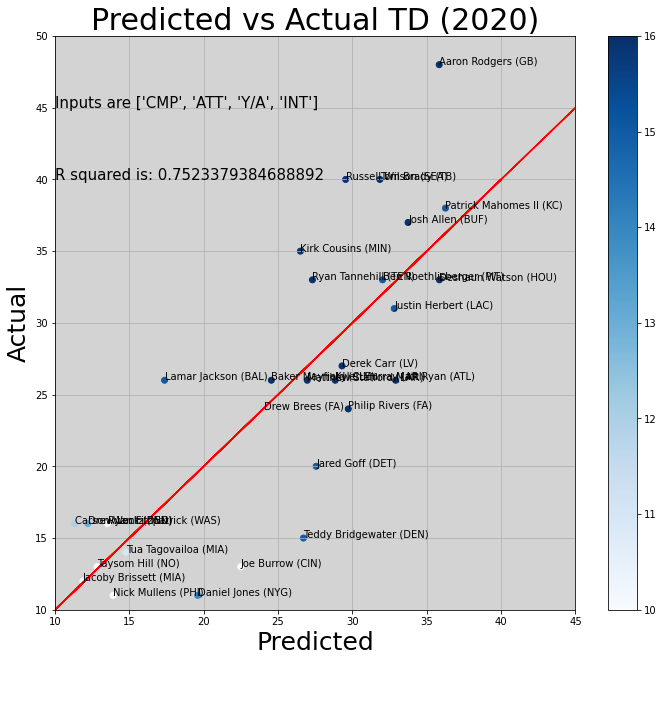

In [39]:
plt.figure(figsize=(10,10))
weight = qb2020.G
plt.scatter(results.fittedvalues, qb2020.TD,marker="o",c= weight,cmap='Blues')

plt.xlim(10,45)
plt.ylim(10,50)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual TD (2020)",fontsize=30)
plt.plot(qb2020.TD, qb2020.TD,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(10,40),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(10,45),fontsize=15)
plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = qb2020.Player

for i,txt in enumerate(n):
    try:
        print(qb2020.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], qb2020.TD[i]))
    except:
        print(f'Player #{i} was not added')
plt.tight_layout()
plt.show()

In [36]:
predicted = results.fittedvalues
actual = qb2020.TD
name = qb2020.Player
games = qb2020.G
difference  = qb2020.TD - results.fittedvalues
qbDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(qbDict)

In [37]:
predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
2,Aaron Rodgers (GB),16.0,35.836951,48.0,12.163049
5,Russell Wilson (SEA),16.0,29.546128,40.0,10.453872
9,Lamar Jackson (BAL),15.0,17.369775,26.0,8.630225
10,Kirk Cousins (MIN),16.0,26.505095,35.0,8.494905
7,Tom Brady (TB),16.0,31.849066,40.0,8.150934
6,Ryan Tannehill (TEN),16.0,27.311615,33.0,5.688385
49,Jacoby Brissett (MIA),11.0,-5.145454,0.0,5.145454
21,Carson Wentz (IND),12.0,11.338605,16.0,4.661395
22,Drew Lock (DEN),13.0,12.211146,16.0,3.788854
0,Josh Allen (BUF),16.0,33.743763,37.0,3.256237


0             Josh Allen (BUF)
1           Kyler Murray (ARI)
2           Aaron Rodgers (GB)
3      Patrick Mahomes II (KC)
4         Deshaun Watson (HOU)
5         Russell Wilson (SEA)
6         Ryan Tannehill (TEN)
7               Tom Brady (TB)
8         Justin Herbert (LAC)
9          Lamar Jackson (BAL)
10          Kirk Cousins (MIN)
11             Matt Ryan (ATL)
12             Derek Carr (LV)
13    Ben Roethlisberger (PIT)
14      Matthew Stafford (LAR)
15             Cam Newton (NE)
16        Baker Mayfield (CLE)
17            Jared Goff (DET)
18     Teddy Bridgewater (DEN)
19          Philip Rivers (FA)
20             Drew Brees (FA)
21          Carson Wentz (IND)
22             Drew Lock (DEN)
23          Daniel Jones (NYG)
24            Joe Burrow (CIN)
26     Mitchell Trubisky (BUF)
27      Ryan Fitzpatrick (WAS)
28            Taysom Hill (NO)
29           Sam Darnold (CAR)
30           Andy Dalton (CHI)
31        Tua Tagovailoa (MIA)
33          Nick Mullens (PHI)
34      